## Milestone 4 Example Solution

_Using the test set, compute and plot a confusion matrix of all command words._

In [75]:
from sklearn.metrics import confusion_matrix
import seaborn

<AxesSubplot:>

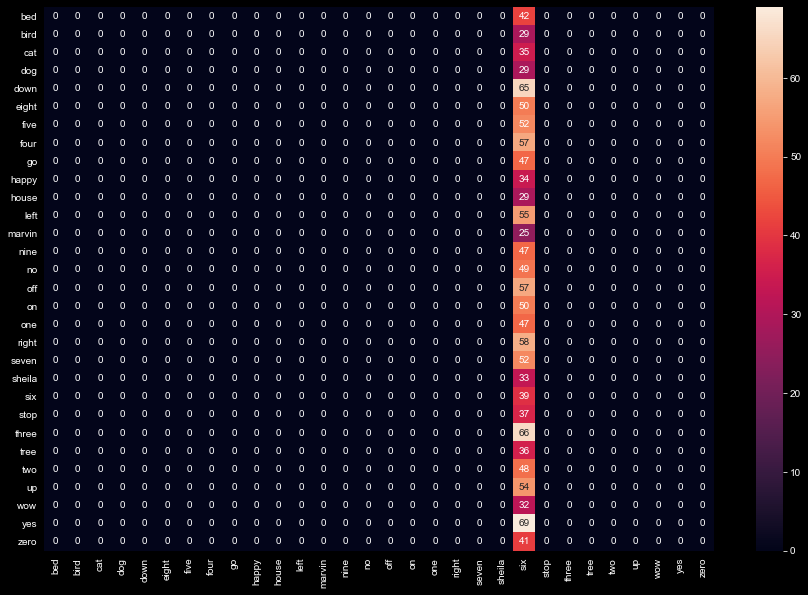

In [76]:
plt.figure(figsize=(15,10))
seaborn.heatmap(
    pandas.DataFrame(
        confusion_matrix(y_test, y_pred),
        index=encoder.classes_,
        columns=encoder.classes_
    ),
    annot=True
)

_Consider and evaluate options for optimizing the network architecture_

In [77]:
opt_net = keras.models.Sequential(
    [
        keras.layers.Convolution2D(
            input_shape=input_shape,
            filters=8,
            kernel_size=(3,3),
            activation="relu",
        ),
        keras.layers.MaxPooling2D(
            pool_size=(2,2)
        ),
        keras.layers.BatchNormalization(),
        keras.layers.Convolution2D(
            filters=16,
            kernel_size=(3,3),
            activation="relu"
        ),
        keras.layers.MaxPooling2D(
            pool_size=(2,2)
        ),
        keras.layers.BatchNormalization(),
        keras.layers.Convolution2D(
            filters=32,
            kernel_size=(3,3),
            activation="relu"
        ),
        keras.layers.MaxPooling2D(
            pool_size=(2,2)
        ),
        keras.layers.BatchNormalization(),
        keras.layers.Flatten(),
        keras.layers.Dense(
            units=64,
            activation="relu"
        ),
        keras.layers.Dropout(0.2),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(
            units=32,
            activation="relu"
        ),
        keras.layers.Dropout(0.2),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(
            units=n_classes,
            activation="softmax"
        )
        
    ]
)

In [78]:
opt_net.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=[
        "accuracy", 
    ]
)

In [79]:
history = opt_net.fit(
    X_train,
    y_train,
    epochs=100,
    verbose=True,
    validation_split=0.2,
    callbacks=[
        keras.callbacks.EarlyStopping(
            monitor="val_accuracy",
            min_delta=0.0001,
            patience=4,
        )
    ],
)

Epoch 1/100
307/307 [==============================] - 21s 69ms/step - loss: 3.3242 - accuracy: 0.0649 - val_loss: 2.8182 - val_accuracy: 0.1972
Epoch 2/100
307/307 [==============================] - 22s 72ms/step - loss: 2.4716 - accuracy: 0.2799 - val_loss: 1.8885 - val_accuracy: 0.4446
Epoch 3/100
307/307 [==============================] - 25s 80ms/step - loss: 1.6932 - accuracy: 0.4792 - val_loss: 1.2830 - val_accuracy: 0.6328
Epoch 4/100
307/307 [==============================] - 22s 72ms/step - loss: 1.2331 - accuracy: 0.6157 - val_loss: 1.0086 - val_accuracy: 0.7013
Epoch 5/100
307/307 [==============================] - 21s 70ms/step - loss: 1.0018 - accuracy: 0.6829 - val_loss: 0.8588 - val_accuracy: 0.7461
Epoch 6/100
307/307 [==============================] - 20s 66ms/step - loss: 0.8210 - accuracy: 0.7420 - val_loss: 0.7580 - val_accuracy: 0.7698
Epoch 7/100
307/307 [==============================] - 21s 67ms/step - loss: 0.7183 - accuracy: 0.7713 - val_loss: 0.7776 - val_ac

In [80]:
y_pred_opt = opt_net.predict_classes(X_test)

In [81]:
accuracy_score(y_test, y_pred_opt)

0.8189149560117303

In [82]:
f1_score(y_test, y_pred_opt, average="macro")

0.8165053582778525

<AxesSubplot:>

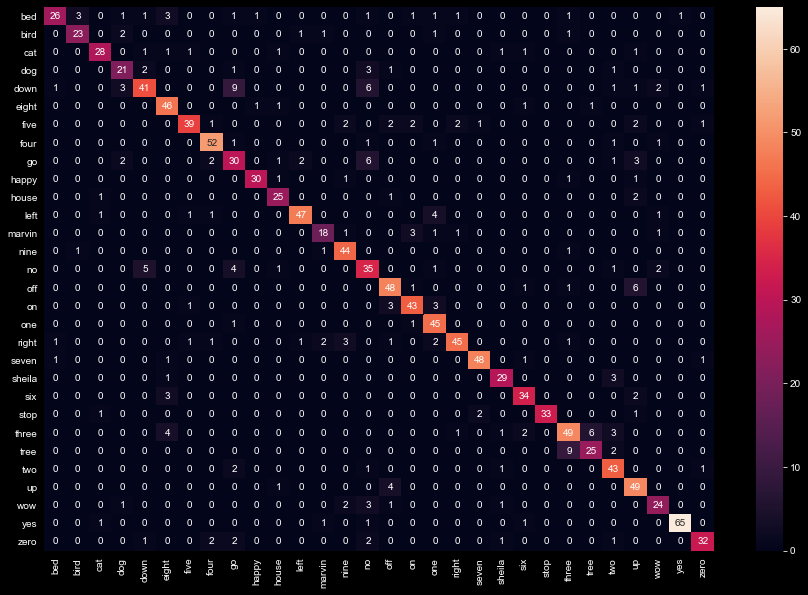

In [83]:
plt.figure(figsize=(15,10))
seaborn.heatmap(
    pandas.DataFrame(
        confusion_matrix(y_test, y_pred_opt),
        index=encoder.classes_,
        columns=encoder.classes_
    ),
    annot=True
)